In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker
import IPython.display

plt.rcParams['font.family'] = ["D2Coding"]

In [2]:
class StockModel:
    def __init__(self, initial=0):
        self.gain = initial
        self.history: list = [self.gain]
    # would be emulated
    def progress(self, *args, **kwargs):
        pass

    def __next__(self):
        self.gain = self.progress()
        self.history.append(self.gain)
        return self.gain

    @property
    def now(self):
        return self.gain

# RandomWalk

랜덤워크



In [3]:
class RandomWalk(StockModel):
    def __init__(self, initial=0, distribution=1):
        super().__init__(initial)
        self.distribution = distribution

    def progress(self, *args, **kwargs):
        return self.gain + random.randint(-1, 1)

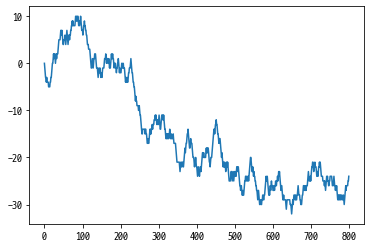

In [4]:
model = RandomWalk(distribution=5)

n = 800

for _ in range(n-1):
    next(model)

plt.plot(range(n), model.history)

# Geometric Brownian Motion

다음을 따르는 SDE
$$dS_t = \mu S_t\,dt + \sigma S_t\,dW_t$$

이는 초기값 $S_0$에 대해 다음과 같은 해석적 해를 가지고 있다.
$$S_t = S_0 \cdot \text{exp}\left(\left(\mu-\frac{\sigma^2}{2}\right)+\sigma W_t\right)$$

In [5]:
class GBM(StockModel):
    def __init__(self, initial=0, mu = 0.2, sigma=0.3):
        super().__init__(initial)
        self.initial = initial
        self.dt = 1/300
        self.mu = mu
        self.sigma = sigma

    def progress(self, *args, **kwargs):
        e = np.random.normal(0, np.sqrt(self.dt))
        self.gain = self.gain * np.exp((self.mu - 0.5 * self.sigma ** 2) * self.dt + self.sigma * e)
        return self.gain

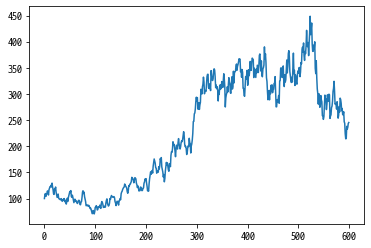

In [6]:
model = GBM(initial=100, mu =1, sigma = 0.8)

n = 600

for _ in range(n-1):
    next(model)

plt.plot(range(n), model.history)
plt.show()